In [1]:
push!(LOAD_PATH, "../src/")
using Setup
using ODESolvers

In [2]:
include("../src/PhysicalConstants.jl")

0.567

In [3]:
model, core, env, var = setup("../src/sample.ini")
sol = cooling(model, core, env, var, (0.1, 1e9));

In [4]:
model, core, env, var = setup("../src/sample2.ini")
sol2 = cooling(model, core, env, var, (0.1, 2e6));

In [5]:
using Plots
pyplot()

┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1190
┌ Info: Recompiling stale cache file /Users/yanagi/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


Plots.PyPlotBackend()

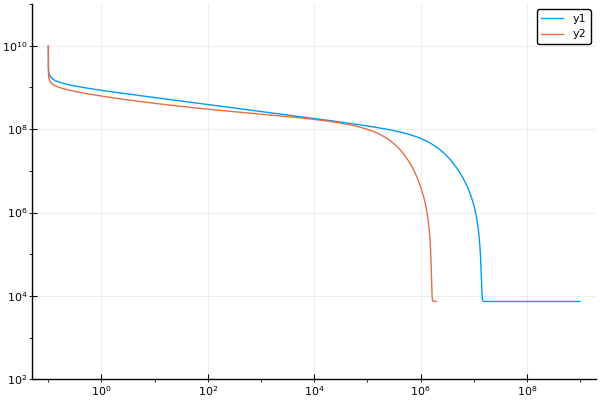

In [6]:
plot(sol.t, sol.u, scale=:log10, yscale=:log10)
plot!(sol2.t, sol2.u, scale=:log10, yscale=:log10)
ylims!(1e2,1e11)

In [7]:
model, core, env, var = setup("../src/sample.ini")
sol = heating(model, core, env, var, (var.t,1e9), 1e-10, 1e-10);

model.Znpe * Rate_e = 4.6065489744193925e-31
model.Znp * Rate_mu = 1.2112781314877407e-33
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169552795632577e-15
model.Znpe * Rate_e = 4.6065489744193925e-31
model.Znp * Rate_mu = 1.2112781314877407e-33
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169552795632577e-15
model.Znpe * Rate_e = 6.075402276534434e-22
model.Znp * Rate_mu = 2.1300115577257857e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169552764336713e-15
model.Znpe * Rate_e = 3.626878532533302e-14
model.Znp * Rate_mu = 1.2715694587208614e-16
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169552764336713e-15
model.Znpe * Rate_e = -1.8298844996094806e-20
model.Znp * Rate_mu = -1.820707731994352e-23
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169552764336713e-15
model.Znpe * Rate_e = 1.4572368230179747e-15
model.Znp * Rate_mu = 5.109013583117485e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1695527878086112e-15
model.Znpe * Rate_e = -1.877680995358142e-15
model.Znp * Ra

model.Znp * Rate_mu = 1.0853829340180177e-13
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1695495230333468e-15
model.Znpe * Rate_e = -1.83030117988744e-10
model.Znp * Rate_mu = -1.905800176588845e-13
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169549188375034e-15
model.Znpe * Rate_e = 3.3238878042266114e-10
model.Znp * Rate_mu = 3.3172684345709697e-13
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1695488537168655e-15
model.Znpe * Rate_e = -6.487760290512273e-10
model.Znp * Rate_mu = -5.64584397431887e-13
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1695485190588403e-15
model.Znpe * Rate_e = 1.898492903210336e-9
model.Znp * Rate_mu = 1.0831473161400103e-12
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1695481844009591e-15
model.Znpe * Rate_e = -4.141747660790706e-8
model.Znp * Rate_mu = -5.082349511873213e-12
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169547849743221e-15
model.Znpe * Rate_e = 3.183582790231061e-6
model.Znp * Rate_mu = 1.9090192527959131e-10
2 * model.Wnpe *

model.Znp * Rate_mu = 1.0840411690732055e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1692508840108379e-15
model.Znpe * Rate_e = 9.929436320529363e-15
model.Znp * Rate_mu = 3.220796677208519e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169208659473596e-15
model.Znpe * Rate_e = -2.7882715401051486e-14
model.Znp * Rate_mu = -8.78712936775084e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.169166437223562e-15
model.Znpe * Rate_e = 4.182274111992867e-14
model.Znp * Rate_mu = 6.39286097890566e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1690915606538195e-15
model.Znpe * Rate_e = -1.2677482283370225e-14
model.Znp * Rate_mu = 6.0599973953977225e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1690915606538195e-15
model.Znpe * Rate_e = 1.1995431885288998e-14
model.Znp * Rate_mu = 3.146585092489521e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1690166912767925e-15
model.Znpe * Rate_e = 8.687941770327295e-15
model.Znp * Rate_mu = 2.783952566070614e-17
2 * model.Wnpe *

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0199557030854751e-15
model.Znpe * Rate_e = 8.461708451100212e-16
model.Znp * Rate_mu = 3.3501295130966234e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0199557030854751e-15
model.Znpe * Rate_e = 8.367169742939127e-16
model.Znp * Rate_mu = 4.130598229590029e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.001296064602102e-15
model.Znpe * Rate_e = 8.113328501917402e-16
model.Znp * Rate_mu = 5.0526598133229016e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.831438359439612e-16
model.Znpe * Rate_e = 7.9825413731754e-16
model.Znp * Rate_mu = 7.33236076813217e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.5075350022463e-16
model.Znpe * Rate_e = 7.731079125348383e-16
model.Znp * Rate_mu = 7.234139883246805e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.5075350022463e-16
model.Znpe * Rate_e = 7.677566093882317e-16
model.Znp * Rate_mu = 1.0153246087463097e-16
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.19937871725152e-16
model.

model.Znp * Rate_mu = 7.331836447264015e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.8817493920622889e-16
model.Znpe * Rate_e = 9.778163464713354e-17
model.Znp * Rate_mu = 6.755228410344135e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7927062636778461e-16
model.Znpe * Rate_e = 1.1279743938186572e-16
model.Znp * Rate_mu = 6.968129409799877e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7927062636778461e-16
model.Znpe * Rate_e = 9.336428020724618e-17
model.Znp * Rate_mu = 6.166495595685694e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.6159630246543138e-16
model.Znpe * Rate_e = 1.1000295647726395e-16
model.Znp * Rate_mu = 5.645956821226144e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.34879511814807e-16
model.Znpe * Rate_e = 2.0487124693541274e-17
model.Znp * Rate_mu = 4.491133977960766e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.34879511814807e-16
model.Znpe * Rate_e = 3.163784767777422e-16
model.Znp * Rate_mu = 8.277666893458447e-17
2 * model.Wnpe * var.

model.Znp * Rate_mu = 9.150420110270384e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.2096094606140623e-17
model.Znpe * Rate_e = 8.893935902539927e-17
model.Znp * Rate_mu = 1.188367641262313e-17
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.958591241530699e-18
model.Znpe * Rate_e = -4.816472103636596e-14
model.Znp * Rate_mu = -1.204460094566667e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.958591241530699e-18
model.Znpe * Rate_e = 1.4816310501073066e-17
model.Znp * Rate_mu = 7.95215769965348e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7539911948553672e-17
model.Znpe * Rate_e = 6.256130236364971e-18
model.Znp * Rate_mu = 6.953247104284618e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7539911948553672e-17
model.Znpe * Rate_e = 1.4820012103097794e-17
model.Znp * Rate_mu = 7.937951684118331e-18
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7539911948553672e-17
model.Znpe * Rate_e = 1.2200522310923043e-17
model.Znp * Rate_mu = 8.711805014824202e-18
2 * model.Wnpe * v

2 * model.Wnpe * var.Omega * var.Omega_dot = 2.7663681531085515e-19
model.Znpe * Rate_e = 2.0900008397050449e-19
model.Znp * Rate_mu = 1.6793764915871487e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.502930114748498e-19
model.Znpe * Rate_e = -4.538147098408256e-21
model.Znp * Rate_mu = 1.4303566069834416e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.275405952269335e-19
model.Znpe * Rate_e = 2.0123036623300375e-19
model.Znp * Rate_mu = 1.4036463677800409e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9878201674294043e-19
model.Znpe * Rate_e = -6.143737571721511e-20
model.Znp * Rate_mu = 1.1212768211093313e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7515001480992746e-19
model.Znpe * Rate_e = 1.60659055402553e-19
model.Znp * Rate_mu = 1.141411173835668e-19
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.554947299450735e-19
model.Znpe * Rate_e = -4.894502145917354e-20
model.Znp * Rate_mu = 9.298690850772863e-20
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.389714973682

model.Znp * Rate_mu = 4.0822478789443916e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.696585781853178e-26
model.Znpe * Rate_e = -1.354618382842046e-28
model.Znp * Rate_mu = 3.995229835609752e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.408837082432961e-26
model.Znpe * Rate_e = -1.4128540928820188e-28
model.Znp * Rate_mu = 3.912055055299201e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.142352580289243e-26
model.Znpe * Rate_e = -1.4082791055144896e-28
model.Znp * Rate_mu = 3.911898416802811e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.142352580289243e-26
model.Znpe * Rate_e = -1.4592638247503507e-28
model.Znp * Rate_mu = 3.83159190881931e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.895087553775293e-26
model.Znpe * Rate_e = -1.5173375725317056e-28
model.Znp * Rate_mu = 3.754472829400889e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.665237271050752e-26
model.Znpe * Rate_e = -1.5992466363543356e-28
model.Znp * Rate_mu = 3.639867047074169e-24
2 * model.Wnpe 

model.Znp * Rate_mu = 1.86404208696115e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0247637022773518e-26
model.Znpe * Rate_e = -6.069172643613221e-28
model.Znp * Rate_mu = 1.8640282771565374e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0247637022773518e-26
model.Znpe * Rate_e = -6.676244557100218e-28
model.Znp * Rate_mu = 1.7769249839946884e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.307120133659566e-27
model.Znpe * Rate_e = -6.68091186622604e-28
model.Znp * Rate_mu = 1.7767781741078375e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.307120133659566e-27
model.Znpe * Rate_e = -6.677466591464313e-28
model.Znp * Rate_mu = 1.7767633352025298e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.307120133659566e-27
model.Znpe * Rate_e = -6.216045190400744e-28
model.Znp * Rate_mu = 1.8414743755367143e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.999573104414072e-27
model.Znpe * Rate_e = -6.371018032649237e-28
model.Znp * Rate_mu = 1.8194492448547428e-24
2 * model.Wnpe

model.Znp * Rate_mu = 1.2318429513190246e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.5390425980202095e-27
model.Znpe * Rate_e = -1.4292649712932171e-27
model.Znp * Rate_mu = 1.1978395144385403e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.30211375914396e-27
model.Znpe * Rate_e = -1.4282843839894218e-27
model.Znp * Rate_mu = 1.1977959011411258e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.30211375914396e-27
model.Znpe * Rate_e = -1.4291813806703673e-27
model.Znp * Rate_mu = 1.1978170825872918e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.30211375914396e-27
model.Znpe * Rate_e = -1.3744750061794967e-27
model.Znp * Rate_mu = 1.2231680118675035e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.4780083393177004e-27
model.Znpe * Rate_e = -1.392351269808034e-27
model.Znp * Rate_mu = 1.2146026031140795e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.418196900901998e-27
model.Znpe * Rate_e = -1.4284107753849622e-27
model.Znp * Rate_mu = 1.1980230023518096e-24
2 * model

2 * model.Wnpe * var.Omega * var.Omega_dot = 2.2109249721687676e-27
model.Znpe * Rate_e = -2.6532285827422288e-27
model.Znp * Rate_mu = 8.423988633706029e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.2109249721687676e-27
model.Znpe * Rate_e = -2.5162457859372886e-27
model.Znp * Rate_mu = 8.692181663358508e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.3480446541255525e-27
model.Znpe * Rate_e = -2.5158180550449432e-27
model.Znp * Rate_mu = 8.693239254481478e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.3480446541255525e-27
model.Znpe * Rate_e = -2.5625013823267004e-27
model.Znp * Rate_mu = 8.598484152275592e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.30095392508959e-27
model.Znpe * Rate_e = -2.562130207591622e-27
model.Znp * Rate_mu = 8.599529158031544e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.30095392508959e-27
model.Znpe * Rate_e = -2.5619927417863473e-27
model.Znp * Rate_mu = 8.599500908050915e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.3009539250

model.Znp * Rate_mu = 7.1154053791670955e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.6190737581105915e-27
model.Znpe * Rate_e = -3.3992459802969715e-27
model.Znp * Rate_mu = 7.235198559254174e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.6702802631402215e-27
model.Znpe * Rate_e = -3.430039416231844e-27
model.Znp * Rate_mu = 7.194334123271594e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.652944778677105e-27
model.Znpe * Rate_e = -3.556797509003815e-27
model.Znp * Rate_mu = 7.031476222463352e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.5855894381177083e-27
model.Znpe * Rate_e = -3.553982582933456e-27
model.Znp * Rate_mu = 7.0351468038203525e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.5855894381177083e-27
model.Znpe * Rate_e = -3.5537007432845965e-27
model.Znp * Rate_mu = 7.035036049776147e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.5855894381177083e-27
model.Znpe * Rate_e = -3.461215938499501e-27
model.Znp * Rate_mu = 7.1534923593530795e-25
2 * model.

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2667541496724631e-27
model.Znpe * Rate_e = -4.3404361853637196e-27
model.Znp * Rate_mu = 6.182681363481724e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2519384885366565e-27
model.Znpe * Rate_e = -4.543075670795221e-27
model.Znp * Rate_mu = 5.998496219354342e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1857951555187103e-27
model.Znpe * Rate_e = -4.537190740510653e-27
model.Znp * Rate_mu = 6.003954265601525e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1857951555187103e-27
model.Znpe * Rate_e = -4.390122799964028e-27
model.Znp * Rate_mu = 6.136378135198418e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2348932354119488e-27
model.Znpe * Rate_e = -4.4398546135824216e-27
model.Znp * Rate_mu = 6.09081224731995e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2181937361670336e-27
model.Znpe * Rate_e = -4.964470275542367e-27
model.Znp * Rate_mu = 5.651136957743903e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0683158663

model.Znp * Rate_mu = 5.126493868798434e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.902697545154488e-28
model.Znpe * Rate_e = -5.747184754152402e-27
model.Znp * Rate_mu = 5.108091896738528e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.845109803991303e-28
model.Znpe * Rate_e = -5.7990609332613785e-27
model.Znp * Rate_mu = 5.075785038576051e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.744495641589159e-28
model.Znpe * Rate_e = -5.7993068145454084e-27
model.Znp * Rate_mu = 5.075795115398669e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.744495641589159e-28
model.Znpe * Rate_e = -5.948303653187811e-27
model.Znp * Rate_mu = 4.985623181746626e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.468898626906272e-28
model.Znpe * Rate_e = -5.946442518564406e-27
model.Znp * Rate_mu = 4.987256661522533e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.468898626906272e-28
model.Znpe * Rate_e = -5.8361509964156355e-27
model.Znp * Rate_mu = 5.053117743820367e-25
2 * model.Wnpe * 

2 * model.Wnpe * var.Omega * var.Omega_dot = 6.893009729279297e-28
model.Znpe * Rate_e = -6.899005287240184e-27
model.Znp * Rate_mu = 4.480907703677412e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.983705097329738e-28
model.Znpe * Rate_e = -6.921863740183002e-27
model.Znp * Rate_mu = 4.470028191676407e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.953275430411371e-28
model.Znpe * Rate_e = -6.977496871385348e-27
model.Znp * Rate_mu = 4.443841512761309e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.880493791173161e-28
model.Znpe * Rate_e = -7.131290941205822e-27
model.Znp * Rate_mu = 4.372968040289351e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.686054859711431e-28
model.Znpe * Rate_e = -7.129035834965594e-27
model.Znp * Rate_mu = 4.374109265730188e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.686054859711431e-28
model.Znpe * Rate_e = -7.015398291895612e-27
model.Znp * Rate_mu = 4.426145797628407e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.8310964981894145e

model.Znp * Rate_mu = 3.6943885658158254e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.940751046292825e-28
model.Znpe * Rate_e = -8.901131225347715e-27
model.Znp * Rate_mu = 3.69438312499191e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.940751046292825e-28
model.Znpe * Rate_e = -8.84586203580671e-27
model.Znp * Rate_mu = 3.712466723436823e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.984164771549083e-28
model.Znpe * Rate_e = -8.864408835073174e-27
model.Znp * Rate_mu = 3.7063987319667765e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.96963016767085e-28
model.Znpe * Rate_e = -8.93479817193307e-27
model.Znp * Rate_mu = 3.683510134906178e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.9151752951526635e-28
model.Znpe * Rate_e = -9.066588046857282e-27
model.Znp * Rate_mu = 3.641408619793406e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.815689035361098e-28
model.Znpe * Rate_e = -9.064842644731768e-27
model.Znp * Rate_mu = 3.6418888995909225e-25
2 * model.Wnpe * var

2 * model.Wnpe * var.Omega * var.Omega_dot = 4.084980623405312e-28
model.Znpe * Rate_e = -1.0213887386121686e-26
model.Znp * Rate_mu = 3.3101024429839526e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.062112541459042e-28
model.Znpe * Rate_e = -1.0292502150270149e-26
model.Znp * Rate_mu = 3.289495338745921e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.0173160294900137e-28
model.Znpe * Rate_e = -1.0291894380580165e-26
model.Znp * Rate_mu = 3.2896228588339277e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.0173160294900137e-28
model.Znpe * Rate_e = -1.0292034849930092e-26
model.Znp * Rate_mu = 3.289625046325771e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.0173160294900137e-28
model.Znpe * Rate_e = -1.0233411405629564e-26
model.Znp * Rate_mu = 3.3049656339801704e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.050843428330125e-28
model.Znpe * Rate_e = -1.0252983162715164e-26
model.Znp * Rate_mu = 3.2998175172457664e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.0396

2 * model.Wnpe * var.Omega * var.Omega_dot = 3.3895246109447257e-28
model.Znpe * Rate_e = -1.1587005759983549e-26
model.Znp * Rate_mu = 2.9810947725449227e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.371001856401398e-28
model.Znpe * Rate_e = -1.1586953629115717e-26
model.Znp * Rate_mu = 2.9811251605441153e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.371001856401398e-28
model.Znpe * Rate_e = -1.1586869336063543e-26
model.Znp * Rate_mu = 2.9811234848015056e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.371001856401398e-28
model.Znpe * Rate_e = -1.1555277690064002e-26
model.Znp * Rate_mu = 2.988019544165844e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.384879635985007e-28
model.Znpe * Rate_e = -1.1565860153597703e-26
model.Znp * Rate_mu = 2.98571392619759e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.3802442026367914e-28
model.Znpe * Rate_e = -1.1611376282062876e-26
model.Znp * Rate_mu = 2.9758118216002526e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.360409

2 * model.Wnpe * var.Omega * var.Omega_dot = 2.9230475993164385e-28
model.Znpe * Rate_e = -1.272216585295437e-26
model.Znp * Rate_mu = 2.7511662224022865e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.9230475993164385e-28
model.Znpe * Rate_e = -1.272227938479373e-26
model.Znp * Rate_mu = 2.751167827954426e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.9230475993164385e-28
model.Znpe * Rate_e = -1.267391631804405e-26
model.Znp * Rate_mu = 2.7603040800661756e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.9403241471553885e-28
model.Znpe * Rate_e = -1.2690048234545683e-26
model.Znp * Rate_mu = 2.757243761278787e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.934548318163406e-28
model.Znpe * Rate_e = -1.2749143007716182e-26
model.Znp * Rate_mu = 2.746102239535986e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.9136088749503824e-28
model.Znpe * Rate_e = -1.2943574578517714e-26
model.Znp * Rate_mu = 2.709995157379847e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.8464527

model.Znpe * Rate_e = -1.4301221053450928e-26
model.Znp * Rate_mu = 2.479207935806213e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.4305034202374437e-28
model.Znpe * Rate_e = -1.431304377618408e-26
model.Znp * Rate_mu = 2.4773436956536965e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.427270647816604e-28
model.Znpe * Rate_e = -1.4353950489270062e-26
model.Znp * Rate_mu = 2.470928305248402e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.4161743122050505e-28
model.Znpe * Rate_e = -1.4713629823307613e-26
model.Znp * Rate_mu = 2.4157569813941457e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.322594755236009e-28
model.Znpe * Rate_e = -1.4705211552923164e-26
model.Znp * Rate_mu = 2.4170077800332855e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.322594755236009e-28
model.Znpe * Rate_e = -1.4443057792600308e-26
model.Znp * Rate_mu = 2.457047753554309e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.3922562028288725e-28
model.Znpe * Rate_e = -1.453171029049656e-26
model.Zn

model.Znp * Rate_mu = 2.305629100702433e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.137424293970556e-28
model.Znpe * Rate_e = -1.5542613444894238e-26
model.Znp * Rate_mu = 2.296000617847669e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.1216707177634474e-28
model.Znpe * Rate_e = -1.604452047866772e-26
model.Znp * Rate_mu = 2.228300847583583e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.013953233729883e-28
model.Znpe * Rate_e = -1.603333757209516e-26
model.Znp * Rate_mu = 2.2303826587765428e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.013953233729883e-28
model.Znpe * Rate_e = -1.566676095221007e-26
model.Znp * Rate_mu = 2.278911942606339e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.0939452634535148e-28
model.Znpe * Rate_e = -1.5666166272065092e-26
model.Znp * Rate_mu = 2.279046943582241e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 2.0939452634535148e-28
model.Znpe * Rate_e = -1.5573532823282545e-26
model.Znp * Rate_mu = 2.291717630852983e-25
2 * model.Wnp

model.Znpe * Rate_e = -1.6497694893370312e-26
model.Znp * Rate_mu = 2.169782365705748e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9197133742395322e-28
model.Znpe * Rate_e = -1.6586273621089914e-26
model.Znp * Rate_mu = 2.158660523172773e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9023879259519283e-28
model.Znpe * Rate_e = -1.6585638691022626e-26
model.Znp * Rate_mu = 2.158717466527889e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9023879259519283e-28
model.Znpe * Rate_e = -1.6519736409975612e-26
model.Znp * Rate_mu = 2.167005778853104e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9153598905216957e-28
model.Znpe * Rate_e = -1.6541797687616356e-26
model.Znp * Rate_mu = 2.164227931772391e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.9110211991311842e-28
model.Znpe * Rate_e = -1.660163452194153e-26
model.Znp * Rate_mu = 2.156734684613402e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.8993602578916265e-28
model.Znpe * Rate_e = -1.666111667326986e-26
model.Zn

model.Znpe * Rate_e = -1.7530437200823512e-26
model.Znp * Rate_mu = 2.0454419924769124e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7294095885267897e-28
model.Znpe * Rate_e = -1.7540115813757955e-26
model.Znp * Rate_mu = 2.0443333257322645e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7277533337775244e-28
model.Znpe * Rate_e = -1.757656823776513e-26
model.Znp * Rate_mu = 2.0401572568583727e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7215293634414914e-28
model.Znpe * Rate_e = -1.7832196708659404e-26
model.Znp * Rate_mu = 2.0112775923406153e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.679009411763098e-28
model.Znpe * Rate_e = -1.782763706497375e-26
model.Znp * Rate_mu = 2.0116912534434782e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.679009411763098e-28
model.Znpe * Rate_e = -1.7640111162277045e-26
model.Znp * Rate_mu = 2.0329107475947835e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.7107492152201981e-28
model.Znpe * Rate_e = -1.7703364896615484e-26
mode

model.Znpe * Rate_e = -1.899886350404241e-26
model.Znp * Rate_mu = 1.886961304876752e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.4995960805648865e-28
model.Znpe * Rate_e = -1.899855117106173e-26
model.Znp * Rate_mu = 1.8869792470374785e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.4995960805648865e-28
model.Znpe * Rate_e = -1.8998706294621404e-26
model.Znp * Rate_mu = 1.8869806475755915e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.4995960805648865e-28
model.Znpe * Rate_e = -1.8955276708912072e-26
model.Znp * Rate_mu = 1.891386606110571e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.5058010726867322e-28
model.Znpe * Rate_e = -1.8969737519852268e-26
model.Znp * Rate_mu = 1.889912555755086e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.5037284697069268e-28
model.Znpe * Rate_e = -1.9007257207012649e-26
model.Znp * Rate_mu = 1.8861056402754806e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.4983863568900531e-28
model.Znpe * Rate_e = -1.9093529214646117e-26
model

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3885317311648454e-28
model.Znpe * Rate_e = -1.986444681439893e-26
model.Znp * Rate_mu = 1.8021155611435625e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3824514806457729e-28
model.Znpe * Rate_e = -1.9864218976320816e-26
model.Znp * Rate_mu = 1.8021262664398865e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3824514806457729e-28
model.Znpe * Rate_e = -1.9864336118091886e-26
model.Znp * Rate_mu = 1.8021272724735836e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3824514806457729e-28
model.Znpe * Rate_e = -1.982892923362917e-26
model.Znp * Rate_mu = 1.8054810098464802e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3870079134508277e-28
model.Znpe * Rate_e = -1.9840715194764112e-26
model.Znp * Rate_mu = 1.8043597578239132e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.3854866027882004e-28
model.Znpe * Rate_e = -1.9874703780830773e-26
model.Znp * Rate_mu = 1.801140361540552e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.38

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2915739729521002e-28
model.Znpe * Rate_e = -2.061685096597454e-26
model.Znp * Rate_mu = 1.732846940062187e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2898718658130504e-28
model.Znpe * Rate_e = -2.068036720082538e-26
model.Znp * Rate_mu = 1.7271795628302112e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2824399059042362e-28
model.Znpe * Rate_e = -2.0789378198014526e-26
model.Znp * Rate_mu = 1.7175195469126863e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2698065963296805e-28
model.Znpe * Rate_e = -2.0788451732434792e-26
model.Znp * Rate_mu = 1.7175739839585e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2698065963296805e-28
model.Znpe * Rate_e = -2.0707392592854714e-26
model.Znp * Rate_mu = 1.7247746363869828e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.2792639618716352e-28
model.Znpe * Rate_e = -2.073454708058976e-26
model.Znp * Rate_mu = 1.7223599188304657e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.276099

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1894001920752427e-28
model.Znpe * Rate_e = -2.153033181801919e-26
model.Znp * Rate_mu = 1.6537832395488108e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1876171982658273e-28
model.Znpe * Rate_e = -2.1563963813223715e-26
model.Znp * Rate_mu = 1.650973532846769e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1840554005129162e-28
model.Znpe * Rate_e = -2.161592854613972e-26
model.Znp * Rate_mu = 1.6466365766628954e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1785663036939655e-28
model.Znpe * Rate_e = -2.161584578426055e-26
model.Znp * Rate_mu = 1.64664908568713e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1785663036939655e-28
model.Znpe * Rate_e = -2.1615687751907747e-26
model.Znp * Rate_mu = 1.646647813214193e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1785663036939655e-28
model.Znpe * Rate_e = -2.1576869361405715e-26
model.Znp * Rate_mu = 1.649891915730142e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.1826795

2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0673665585183034e-28
model.Znpe * Rate_e = -2.2812496701494134e-26
model.Znp * Rate_mu = 1.5510488244506908e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0602571757627495e-28
model.Znpe * Rate_e = -2.28119956251708e-26
model.Znp * Rate_mu = 1.551070917798419e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0602571757627495e-28
model.Znpe * Rate_e = -2.2755022451542155e-26
model.Znp * Rate_mu = 1.5554610123445255e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0655825240593064e-28
model.Znpe * Rate_e = -2.2774076873531968e-26
model.Znp * Rate_mu = 1.5539916233253565e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0638029587131793e-28
model.Znpe * Rate_e = -2.280383152132303e-26
model.Znp * Rate_mu = 1.551709355336467e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.0610422810671287e-28
model.Znpe * Rate_e = -2.280373523358642e-26
model.Znp * Rate_mu = 1.5517125564771002e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 1.06104

2 * model.Wnpe * var.Omega * var.Omega_dot = 9.879657761833491e-29
model.Znpe * Rate_e = -2.3657457817245467e-26
model.Znp * Rate_mu = 1.4879684392592602e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.850969347710695e-29
model.Znpe * Rate_e = -2.3691009979894887e-26
model.Znp * Rate_mu = 1.4855295227462954e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.82240570993674e-29
model.Znpe * Rate_e = -2.36910004772242e-26
model.Znp * Rate_mu = 1.4855341283158087e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.82240570993674e-29
model.Znpe * Rate_e = -2.369092188355229e-26
model.Znp * Rate_mu = 1.4855335853035126e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.82240570993674e-29
model.Znpe * Rate_e = -2.3665761113630716e-26
model.Znp * Rate_mu = 1.4873613584293615e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.843816768798769e-29
model.Znpe * Rate_e = -2.367418851518634e-26
model.Znp * Rate_mu = 1.4867512062111245e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.836671977062

model.Znpe * Rate_e = -2.4381198511490747e-26
model.Znp * Rate_mu = 1.436563058744821e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.256461509902874e-29
model.Znpe * Rate_e = -2.4395819665355849e-26
model.Znp * Rate_mu = 1.435549975018803e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.244906256929119e-29
model.Znpe * Rate_e = -2.4425891258760613e-26
model.Znp * Rate_mu = 1.4334641711659713e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.221158503888874e-29
model.Znpe * Rate_e = -2.4471631501786933e-26
model.Znp * Rate_mu = 1.4303047560824117e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.18522187726945e-29
model.Znpe * Rate_e = -2.447140964617797e-26
model.Znp * Rate_mu = 1.4303114851222415e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.18522187726945e-29
model.Znpe * Rate_e = -2.4471550495828658e-26
model.Znp * Rate_mu = 1.430312377840564e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 9.18522187726945e-29
model.Znpe * Rate_e = -2.4437292420229855e-26
model.Znp * R

model.Znp * Rate_mu = 1.3868655577932663e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.696877094082143e-29
model.Znpe * Rate_e = -2.514809925258206e-26
model.Znp * Rate_mu = 1.384505868488913e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.670665954285278e-29
model.Znpe * Rate_e = -2.514795552476558e-26
model.Znp * Rate_mu = 1.3845097070913873e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.670665954285278e-29
model.Znpe * Rate_e = -2.5148035967663465e-26
model.Znp * Rate_mu = 1.3845101974413657e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.670665954285278e-29
model.Znpe * Rate_e = -2.51213775793059e-26
model.Znp * Rate_mu = 1.3862786025661977e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.690313177864568e-29
model.Znpe * Rate_e = -2.5130250843668815e-26
model.Znp * Rate_mu = 1.385687869902188e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.683756689958708e-29
model.Znpe * Rate_e = -2.5157991223780175e-26
model.Znp * Rate_mu = 1.3838475554139075e-25
2 * model.Wnp

model.Znpe * Rate_e = -2.605430704334111e-26
model.Znp * Rate_mu = 1.325892610446724e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.030659330699641e-29
model.Znpe * Rate_e = -2.6065289655357454e-26
model.Znp * Rate_mu = 1.3252016979516655e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.023241884269176e-29
model.Znpe * Rate_e = -2.609432770776149e-26
model.Znp * Rate_mu = 1.3233735339346524e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 8.00364831857004e-29
model.Znpe * Rate_e = -2.614917440996214e-26
model.Znp * Rate_mu = 1.3199324507988486e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.966822669002515e-29
model.Znpe * Rate_e = -2.614889483738978e-26
model.Znp * Rate_mu = 1.319941404590857e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.966822669002515e-29
model.Znpe * Rate_e = -2.610799764835479e-26
model.Znp * Rate_mu = 1.3225145884594085e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.994418005515405e-29
model.Znpe * Rate_e = -2.6121669884462724e-26
model.Znp * Ra

model.Znp * Rate_mu = 1.2808562456354785e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.553210061054047e-29
model.Znpe * Rate_e = -2.678283511037811e-26
model.Znp * Rate_mu = 1.2808598647842113e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.553210061054047e-29
model.Znpe * Rate_e = -2.6782921909651716e-26
model.Znp * Rate_mu = 1.2808603433707084e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.553210061054047e-29
model.Znpe * Rate_e = -2.6755813991023145e-26
model.Znp * Rate_mu = 1.2825023503252295e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.570413898580475e-29
model.Znpe * Rate_e = -2.676483616364347e-26
model.Znp * Rate_mu = 1.2819538240312972e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.564672761027882e-29
model.Znpe * Rate_e = -2.6790540852761916e-26
model.Znp * Rate_mu = 1.2803964334330092e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.548390752596946e-29
model.Znpe * Rate_e = -2.686471172057723e-26
model.Znp * Rate_mu = 1.2759132352547025e-25
2 * model.

2 * model.Wnpe * var.Omega * var.Omega_dot = 7.199234438450256e-29
model.Znpe * Rate_e = -2.738173257872451e-26
model.Znp * Rate_mu = 1.2451233712320681e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.183257300411859e-29
model.Znpe * Rate_e = -2.7423587625529014e-26
model.Znp * Rate_mu = 1.2426700054638324e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.158163070319202e-29
model.Znpe * Rate_e = -2.742338962262541e-26
model.Znp * Rate_mu = 1.2426746991525333e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.158163070319202e-29
model.Znpe * Rate_e = -2.742352535124803e-26
model.Znp * Rate_mu = 1.2426754192606139e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.158163070319202e-29
model.Znpe * Rate_e = -2.739216872105786e-26
model.Znp * Rate_mu = 1.24451126394432e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.176971386211292e-29
model.Znpe * Rate_e = -2.7402599853429683e-26
model.Znp * Rate_mu = 1.243897763456327e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 7.170693719404

model.Znpe * Rate_e = -2.797388114395301e-26
model.Znp * Rate_mu = 1.2108421368569704e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.835779413887652e-29
model.Znpe * Rate_e = -2.801365916569322e-26
model.Znp * Rate_mu = 1.2085781718051357e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.813104807926929e-29
model.Znpe * Rate_e = -2.8013480061700246e-26
model.Znp * Rate_mu = 1.208582301333229e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.813104807926929e-29
model.Znpe * Rate_e = -2.80135977138468e-26
model.Znp * Rate_mu = 1.208582903990515e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.813104807926929e-29
model.Znpe * Rate_e = -2.7983803749007016e-26
model.Znp * Rate_mu = 1.2102770571032927e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.830100162159094e-29
model.Znpe * Rate_e = -2.7993718652681046e-26
model.Znp * Rate_mu = 1.2097109904132556e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.824427985082502e-29
model.Znpe * Rate_e = -2.802049551904931e-26
model.Znp * R

model.Znp * Rate_mu = 1.1639186019971897e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.372002235696008e-29
model.Znpe * Rate_e = -2.8778674536776617e-26
model.Znp * Rate_mu = 1.1658076675425215e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.390423349716842e-29
model.Znpe * Rate_e = -2.879015680380672e-26
model.Znp * Rate_mu = 1.1651764976558133e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.384274112600132e-29
model.Znpe * Rate_e = -2.881640375009714e-26
model.Znp * Rate_mu = 1.1637386894544758e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.370282462464994e-29
model.Znpe * Rate_e = -2.885615556536113e-26
model.Znp * Rate_mu = 1.1615602286981492e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.34910540006576e-29
model.Znpe * Rate_e = -2.8856114664724505e-26
model.Znp * Rate_mu = 1.1615649265184216e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.34910540006576e-29
model.Znpe * Rate_e = -2.8855969813350263e-26
model.Znp * Rate_mu = 1.1615641986105867e-25
2 * model.Wn

2 * model.Wnpe * var.Omega * var.Omega_dot = 6.115707272419161e-29
model.Znpe * Rate_e = -2.933266081534398e-26
model.Znp * Rate_mu = 1.1357736047329676e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.1005074523239e-29
model.Znpe * Rate_e = -2.938518741688851e-26
model.Znp * Rate_mu = 1.1329639924708274e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.073703466449127e-29
model.Znpe * Rate_e = -2.93850624197376e-26
model.Znp * Rate_mu = 1.1329717686243444e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.073703466449127e-29
model.Znpe * Rate_e = -2.9345723923326366e-26
model.Znp * Rate_mu = 1.1350723588185976e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.093789845854427e-29
model.Znpe * Rate_e = -2.935887201820171e-26
model.Znp * Rate_mu = 1.1343702365033645e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.087083328971532e-29
model.Znpe * Rate_e = -2.9383360753942145e-26
model.Znp * Rate_mu = 1.133060461103937e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 6.0745910981020

model.Znpe * Rate_e = -2.9870798908388685e-26
model.Znp * Rate_mu = 1.107297327933219e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.830871769989108e-29
model.Znpe * Rate_e = -2.9870756882273536e-26
model.Znp * Rate_mu = 1.10729763688618e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.830871769989108e-29
model.Znpe * Rate_e = -2.9898664926368877e-26
model.Znp * Rate_mu = 1.1058417360961478e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.817239382154438e-29
model.Znpe * Rate_e = -2.9898554186646267e-26
model.Znp * Rate_mu = 1.105843534122008e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.817239382154438e-29
model.Znpe * Rate_e = -2.9898626610768984e-26
model.Znp * Rate_mu = 1.1058438687122126e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.817239382154438e-29
model.Znpe * Rate_e = -2.987774622094635e-26
model.Znp * Rate_mu = 1.1069335748756259e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.827459184021765e-29
model.Znpe * Rate_e = -2.988469363266511e-26
model.Znp * 

model.Znp * Rate_mu = 1.0721229666081153e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.504477798136495e-29
model.Znpe * Rate_e = -3.039711031429798e-26
model.Znp * Rate_mu = 1.080071712706677e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.577948859499824e-29
model.Znpe * Rate_e = -3.044945066477045e-26
model.Znp * Rate_mu = 1.077393077343002e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.553295905944659e-29
model.Znpe * Rate_e = -3.0449321349106275e-26
model.Znp * Rate_mu = 1.077400566800492e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.553295905944659e-29
model.Znpe * Rate_e = -3.0410009970819955e-26
model.Znp * Rate_mu = 1.0794068195025002e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.571770253449355e-29
model.Znpe * Rate_e = -3.042315574232384e-26
model.Znp * Rate_mu = 1.0787362336909822e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.565601907632911e-29
model.Znpe * Rate_e = -3.0442930163369155e-26
model.Znp * Rate_mu = 1.0777244511878613e-25
2 * model.Wnp

model.Znp * Rate_mu = 1.0395611136066216e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.210332854819913e-29
model.Znpe * Rate_e = -3.127650777328014e-26
model.Znp * Rate_mu = 1.0358411115980107e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.177054413991964e-29
model.Znpe * Rate_e = -3.127598212133987e-26
model.Znp * Rate_mu = 1.0358551215148139e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.177054413991964e-29
model.Znpe * Rate_e = -3.121984433638868e-26
model.Znp * Rate_mu = 1.0386409064157657e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.201983226948564e-29
model.Znpe * Rate_e = -3.123864393913136e-26
model.Znp * Rate_mu = 1.0377085982252604e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.193653653592315e-29
model.Znpe * Rate_e = -3.125747553552346e-26
model.Znp * Rate_mu = 1.0367781375136814e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 5.18534407057876e-29
model.Znpe * Rate_e = -3.1257412408345995e-26
model.Znp * Rate_mu = 1.0367788837761481e-25
2 * model.Wnp

2 * model.Wnpe * var.Omega * var.Omega_dot = 4.970381415797379e-29
model.Znpe * Rate_e = -3.175315768819817e-26
model.Znp * Rate_mu = 1.0124749297718997e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.970381415797379e-29
model.Znpe * Rate_e = -3.1763716829654777e-26
model.Znp * Rate_mu = 1.0119616851730309e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.965883985197161e-29
model.Znpe * Rate_e = -3.1798421109843736e-26
model.Znp * Rate_mu = 1.0102779411381415e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.9511543308613825e-29
model.Znpe * Rate_e = -3.1868009163341444e-26
model.Znp * Rate_mu = 1.0069112205403141e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.9217546084691365e-29
model.Znpe * Rate_e = -3.1867386740283283e-26
model.Znp * Rate_mu = 1.0069223592680319e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.9217546084691365e-29
model.Znpe * Rate_e = -3.1815737069820795e-26
model.Znp * Rate_mu = 1.0094376385176346e-25
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.943

2 * model.Wnpe * var.Omega * var.Omega_dot = 4.71581050384783e-29
model.Znpe * Rate_e = -3.229383293859972e-26
model.Znp * Rate_mu = 9.864410892820229e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.744276313142762e-29
model.Znpe * Rate_e = -3.2317033148086917e-26
model.Znp * Rate_mu = 9.853339876285777e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.734759139281521e-29
model.Znpe * Rate_e = -3.235372883992806e-26
model.Znp * Rate_mu = 9.83588306591254e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.719778766079222e-29
model.Znpe * Rate_e = -3.2353532349399166e-26
model.Znp * Rate_mu = 9.835913101858905e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.719778766079222e-29
model.Znpe * Rate_e = -3.2326180386378984e-26
model.Znp * Rate_mu = 9.848983688211886e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.731007366740172e-29
model.Znpe * Rate_e = -3.2335323081276624e-26
model.Znp * Rate_mu = 9.844618360684863e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.727260051729417

model.Znp * Rate_mu = 9.659205385835717e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.569182874737887e-29
model.Znpe * Rate_e = -3.275199856751677e-26
model.Znp * Rate_mu = 9.64744330410711e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.5592408893857746e-29
model.Znpe * Rate_e = -3.2798367460307166e-26
model.Znp * Rate_mu = 9.625661755069542e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.5408545801715996e-29
model.Znpe * Rate_e = -3.2798250235005944e-26
model.Znp * Rate_mu = 9.62571769275467e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.5408545801715996e-29
model.Znpe * Rate_e = -3.276353494188084e-26
model.Znp * Rate_mu = 9.642005179022634e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.554633856973005e-29
model.Znpe * Rate_e = -3.277514014065276e-26
model.Znp * Rate_mu = 9.636562213990371e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.5500338040211354e-29
model.Znpe * Rate_e = -3.2794841264211765e-26
model.Znp * Rate_mu = 9.62730166954133e-26
2 * model.Wnpe *

2 * model.Wnpe * var.Omega * var.Omega_dot = 4.3257975089083593e-29
model.Znpe * Rate_e = -3.3350942388640904e-26
model.Znp * Rate_mu = 9.368368909122173e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.3257975089083593e-29
model.Znpe * Rate_e = -3.3325146185663814e-26
model.Znp * Rate_mu = 9.380316357218917e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.335693155143183e-29
model.Znpe * Rate_e = -3.3333768581190335e-26
model.Znp * Rate_mu = 9.376326402083855e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.3323908368891604e-29
model.Znpe * Rate_e = -3.335424775999339e-26
model.Znp * Rate_mu = 9.366878089955085e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.324578307068595e-29
model.Znpe * Rate_e = -3.3374625699330187e-26
model.Znp * Rate_mu = 9.357455085931406e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.3167868905216225e-29
model.Znpe * Rate_e = -3.337462540535226e-26
model.Znp * Rate_mu = 9.35746680591359e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.3167868905

model.Znpe * Rate_e = -3.374476412693639e-26
model.Znp * Rate_mu = 9.187474360374659e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.1772443304001376e-29
model.Znpe * Rate_e = -3.374484679880933e-26
model.Znp * Rate_mu = 9.187477420470965e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.1772443304001376e-29
model.Znpe * Rate_e = -3.372314572066393e-26
model.Znp * Rate_mu = 9.197376877725599e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.185325053703611e-29
model.Znpe * Rate_e = -3.373036911059904e-26
model.Znp * Rate_mu = 9.19407080334296e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.182628875917576e-29
model.Znpe * Rate_e = -3.3751205272316013e-26
model.Znp * Rate_mu = 9.184559521565288e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.174880000902627e-29
model.Znpe * Rate_e = -3.3787324591387014e-26
model.Znp * Rate_mu = 9.168062237135233e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.1614538068203667e-29
model.Znpe * Rate_e = -3.378726565189609e-26
model.Znp * Rat

model.Znp * Rate_mu = 9.024964812250601e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.045653937499554e-29
model.Znpe * Rate_e = -3.4110103909146737e-26
model.Znp * Rate_mu = 9.021339321576255e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.04273830579195e-29
model.Znpe * Rate_e = -3.412970222103634e-26
model.Znp * Rate_mu = 9.012467724673333e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.035612641997717e-29
model.Znpe * Rate_e = -3.414927980355104e-26
model.Znp * Rate_mu = 9.003622355529913e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.028505800979951e-29
model.Znpe * Rate_e = -3.414920390364444e-26
model.Znp * Rate_mu = 9.00363038082971e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.028505800979951e-29
model.Znpe * Rate_e = -3.414925712141761e-26
model.Znp * Rate_mu = 9.003632317909091e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 4.028505800979951e-29
model.Znpe * Rate_e = -3.413457965347055e-26
model.Znp * Rate_mu = 9.010263227268291e-26
2 * model.Wnpe * var.

model.Znpe * Rate_e = -3.446773188352628e-26
model.Znp * Rate_mu = 8.860099707106064e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.913955245142092e-29
model.Znpe * Rate_e = -3.448519587279258e-26
model.Znp * Rate_mu = 8.852259410160087e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.907742216163188e-29
model.Znpe * Rate_e = -3.451518566761675e-26
model.Znp * Rate_mu = 8.838822084061253e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.8971014103742814e-29
model.Znpe * Rate_e = -3.451503778008699e-26
model.Znp * Rate_mu = 8.838842208933112e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.8971014103742814e-29
model.Znpe * Rate_e = -3.4492677043547236e-26
model.Znp * Rate_mu = 8.848904410630236e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.905077932698117e-29
model.Znpe * Rate_e = -3.4500150014053537e-26
model.Znp * Rate_mu = 8.84554469364736e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9024163730516546e-29
model.Znpe * Rate_e = -3.451640693074336e-26
model.Znp * Rat

Excessive output truncated after 524342 bytes.

model.Znp * Rate_mu = 8.795843380988262e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.863120075318786e-29
model.Znpe * Rate_e = -3.4617041444223595e-26
model.Znp * Rate_mu = 8.793161572642497e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.861005210976286e-29
model.Znpe * Rate_e = -3.463169704272052e-26
model.Znp * Rate_mu = 8.786610687971193e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.855842320202489e-29
model.Znpe * Rate_e = -3.4659648522617405e-26
model.Znp * Rate_mu = 8.77410396979269e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.8459954247120004e-29
model.Znpe * Rate_e = -3.465961560262187e-26
model.Znp * Rate_mu = 8.77412500689686e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.8459954247120004e-29
model.Znpe * Rate_e = -3.4638659238056955e-26
model.Znp * Rate_mu = 8.783486292436164e-26
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.8533770540566157e-29
model.Znpe * Rate_e = -3.4645657986002636e-26
model.Znp * Rate_mu = 8.780360797487982e-26
2 * model.Wnpe 

In [8]:
T = map(u->u[1], sol.u);
eta_e = map(u->u[2]/kB, sol.u);
eta_mu = map(u->u[3]/kB, sol.u);

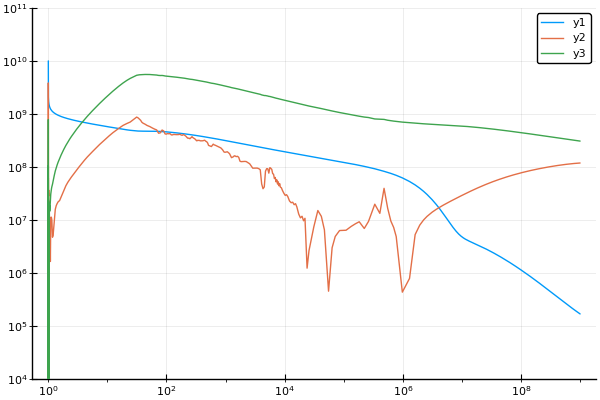

In [9]:
plot(sol.t, T, scale=:log10)
plot!(sol.t, abs.(eta_e), scale=:log10)
plot!(sol.t, eta_mu, scale=:log10)
ylims!(1e4,1e11)

In [10]:
model, core, env, var = setup("../src/sample2.ini")
sol = heating(model, core, env, var, (var.t,1e7), 1e-15, 1e-15);

model.Znpe * Rate_e = 4.6065489744193925e-31
model.Znp * Rate_mu = 1.2112781314877407e-33
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.915469294712544e-21
model.Znpe * Rate_e = 4.6065489744193925e-31
model.Znp * Rate_mu = 1.2112781314877407e-33
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.915469294712544e-21
model.Znpe * Rate_e = 6.238290927129751e-21
model.Znp * Rate_mu = 2.187119662433996e-23
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692947125094e-21
model.Znpe * Rate_e = -5.402386291738787e-21
model.Znp * Rate_mu = 1.611386887204066e-23
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692947125094e-21
model.Znpe * Rate_e = 1.815244286640854e-20
model.Znp * Rate_mu = 3.763005074634787e-23
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692947125094e-21
model.Znpe * Rate_e = 2.587516028929742e-21
model.Znp * Rate_mu = 9.071726935598616e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.915469294712537e-21
model.Znpe * Rate_e = 8.958288846367477e-22
model.Znp * Rate_m

model.Znp * Rate_mu = 2.3227807070815555e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.915469294678362e-21
model.Znpe * Rate_e = 7.349279254168128e-22
model.Znp * Rate_mu = 1.8723064920790784e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692946725005e-21
model.Znpe * Rate_e = 7.415590517359416e-22
model.Znp * Rate_mu = 1.8136187193837166e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692946666414e-21
model.Znpe * Rate_e = 7.154558239304093e-22
model.Znp * Rate_mu = 1.7536759045331147e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692946666414e-21
model.Znpe * Rate_e = 6.876993275983069e-22
model.Znp * Rate_mu = 1.6534601563816177e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692946607794e-21
model.Znpe * Rate_e = 6.809187505607625e-22
model.Znp * Rate_mu = 1.6004140001446833e-24
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9154692946549196e-21
model.Znpe * Rate_e = 5.445269792980916e-22
model.Znp * Rate_mu = 1.1334348183223276e-24
2 * model.Wnpe

model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.91491458047662e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.91491458047662e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.9147820966089255e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.914649619466159e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.914327819785274e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.914327819785274e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.914006059782565e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0.0
2 * model.Wnpe * var.Omega * var.Omega_dot = 3.914006059782565e-21
model.Znpe * Rate_e = 0.0
model.Znp * Rate_mu = 0

DomainError: DomainError with -Inf:
sqrt will only return a complex result if called with a complex argument. Try sqrt(Complex(x)).

In [11]:
T = map(u->u[1], sol.u);
eta_e = map(u->u[2]/kB, sol.u);
eta_mu = map(u->u[3]/kB, sol.u);

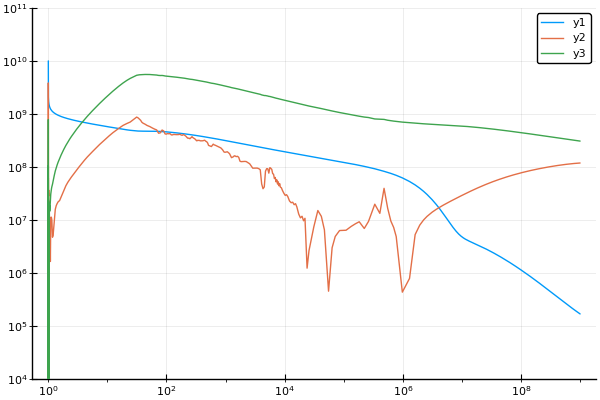

In [12]:
plot(sol.t, T, scale=:log10)
plot!(sol.t, abs.(eta_e), scale=:log10)
plot!(sol.t, eta_mu, scale=:log10)
ylims!(1e4,1e11)